# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [9]:
ny = temp[temp.State == "New York"]
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [12]:
ny.Temperature.mean().round(2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [13]:
# your answer here
more_15 = temp[temp.Temperature > 15]
more_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [15]:
cities_15 = temp.drop(["State"], axis = 1)
cities_15

,City,Temperature
0,NYC,19.444444
1,Albany,9.444444
2,Buffalo,3.333333
3,Hartford,17.222222
4,Bridgeport,14.444444
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [18]:
cond = cities_15.Temperature < 20
cit_15_20 = cities_15[cond]
cit_15_20

,City,Temperature
0,NYC,19.444444
1,Albany,9.444444
2,Buffalo,3.333333
3,Hartford,17.222222
4,Bridgeport,14.444444


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [26]:
print(f"The mean temperature is: {temp.Temperature.mean().round(2)}")
print(f"The standard deviation temperature is: {temp.Temperature.std().round(2)}")

The mean temperature is: 15.16
The standard deviation temperature is: 6.7


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [62]:
employee = pd.read_csv("employee.csv")
employee.sample(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
4,Samuel,Sales,Master,M,associate,3,55
2,David,HR,Master,M,analyst,2,30


#### Explore the data types of the `employee` dataframe. Comment your results

In [30]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

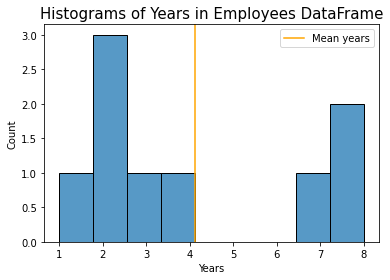

In [63]:
sns.histplot(employee.Years, bins = 9)
plt.axvline(employee.Years.mean(), c="orange", label="Mean years")
plt.title("Histograms of Years in Employees DataFrame", size=15)
plt.legend()


#### En este caso podriamos decir que la distribucion es normal, mientras que en el caso de abajo es uniforme

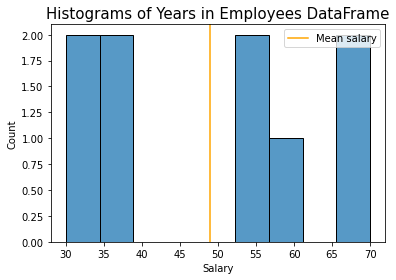

In [68]:
sns.histplot(employee.Salary, bins =9)
plt.axvline(employee.Salary.mean(), c="orange", label="Mean salary")
plt.title("Histograms of Years in Employees DataFrame", size=15)
plt.legend()

#### What's the average salary in this company?

In [70]:
employee.Salary.mean().round(2)

48.89

#### What's the highest salary?

In [71]:
employee.Salary.max()

70

#### What's the lowest salary?

In [78]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [79]:
low = employee[employee.Salary == employee.Salary.min()]
low

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [81]:
david = employee[employee.Name == "David"]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [85]:
david_salary = int(david.Salary)
david_salary

30

#### Print all the rows where job title is associate

In [86]:
associate = employee[employee.Title == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [118]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [90]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [100]:
idx = np.where((employee["Title"] == "associate") & (employee["Salary"] > 55))
employee.loc[idx]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [104]:
employee.groupby("Years").mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [106]:
employee.groupby("Title").mean().round()

,Years,Salary
Title,,
VP,8.0,70.0
analyst,2.0,32.0
associate,4.0,57.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

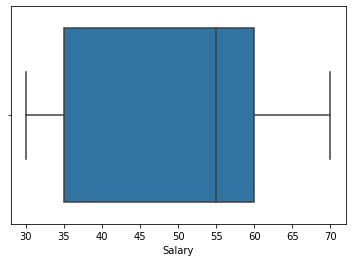

In [108]:
sns.boxplot(x = employee.Salary)

In [109]:
pd.Series(employee.Salary).quantile(.25)

35.0

In [110]:
pd.Series(employee.Salary).quantile(.75)

60.0

#### Is the mean salary per gender different?

In [111]:
employee.groupby("Gender").mean().round()

,Years,Salary
Gender,,
F,4.0,48.0
M,4.0,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [113]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [132]:
maxim = employee.groupby("Department").max()
minim = employee.groupby("Department").min()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [138]:
orders = pd.read_csv("Orders.zip")
orders.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
392090,531719,580960,23201,2011,12,2,14,jumbo bag alphabet,2,2011-12-06 14:35:00,2.08,16016,United Kingdom,4.16
180631,258908,559676,22781,2011,7,1,14,gumball magazine rack,6,2011-07-11 14:40:00,7.65,17340,United Kingdom,45.90
353417,479886,577228,23128,2011,11,5,12,feltcraft boy jean-paul kit,1,2011-11-18 12:07:00,4.95,12391,Cyprus,4.95
87168,131980,547651,22292,2011,3,4,12,hanging chick yellow decoration,1,2011-03-24 12:11:00,1.45,16904,United Kingdom,1.45
90639,135911,547918,21067,2011,3,1,12,vintage red teatime mug,12,2011-03-28 12:49:00,1.25,15249,United Kingdom,15.00


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [136]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [137]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [ ]:
orders.

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here